In [160]:
import pandas as pd
import numpy as np
import plotly.express as px
import folium
from vincenty import vincenty

In [161]:
# Si la base de données n'est pas déjà téléchargée
# df0 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2', sep = '|')

# Sinon
df0 = pd.read_csv('data/valeursfoncieres-2019.txt', sep = '|')


/Users/lilianmarey/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (18,23,24,26,28,29,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.



# I. Nettoyage de la base de données

In [162]:
df1 = df0.copy()

# Option d'affchage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1.sample(5)

Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
1937913              NaN                 NaN             NaN             NaN   
1485722              NaN                 NaN             NaN             NaN   
732862               NaN                 NaN             NaN             NaN   
618875               NaN                 NaN             NaN             NaN   
1342097              NaN                 NaN             NaN             NaN   

         3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
1937913             NaN             NaN             NaN               1   
1485722             NaN             NaN             NaN               1   
732862              NaN             NaN             NaN               1   
618875              NaN             NaN             NaN               1   
1342097             NaN             NaN             NaN               1   

        Date mutation Nature mutation Valeur fonciere  No voie B/T/Q  \
1937913    03/01/2019           Vente     17163136,00      1.0   NaN   
1485722    03/05/2019           Vente        51000,00      NaN   NaN   
732862     02/08/2019         Echange         8400,00      NaN   NaN   
618875     25/02/2019           Vente       468500,00      5.0   NaN   
1342097    02/04/2019           Vente         4000,00      NaN   NaN   

        Type de voie Code voie             Voie  Code postal  \
1937913          IMP      0253     BOUGAINVILLE      78200.0   
1485722          RUE      0200      DES LINIERS      59259.0   
732862           NaN      B016           BARTAN      33840.0   
618875           RPT      0135  CLEMENCE ISAURE      31520.0   
1342097          NaN      B324  LA COQUELINIERE      53640.0   

                    Commune Code departement  Code commune  \
1937913     MANTES-LA-JOLIE               78           361   
1485722             LECLUSE               59           336   
732862       LERM-ET-MUSSET               33           239   
618875   RAMONVILLE ST AGNE               31           446   
1342097    MONTREUIL POULAY               53           160   

         Prefixe de section Section  No plan No Volume 1er lot  \
1937913                 NaN      AX      671       NaN     NaN   
1485722                 NaN       A     1942       NaN     NaN   
732862                  NaN       A       68       NaN     NaN   
618875                  NaN      AH      344       NaN     NaN   
1342097                 NaN      ZB       19       NaN     NaN   

        Surface Carrez du 1er lot 2eme lot Surface Carrez du 2eme lot  \
1937913                       NaN      NaN                        NaN   
1485722                       NaN      NaN                        NaN   
732862                        NaN      NaN                        NaN   
618875                        NaN      NaN                        NaN   
1342097                       NaN      NaN                        NaN   

        3eme lot Surface Carrez du 3eme lot  4eme lot  \
1937913      NaN                        NaN       NaN   
1485722      NaN                        NaN       NaN   
732862       NaN                        NaN       NaN   
618875       NaN                        NaN       NaN   
1342097      NaN                        NaN       NaN   

        Surface Carrez du 4eme lot  5eme lot Surface Carrez du 5eme lot  \
1937913                        NaN       NaN                        NaN   
1485722                        NaN       NaN                        NaN   
732862                         NaN       NaN                        NaN   
618875                         NaN       NaN                        NaN   
1342097                        NaN       NaN                        NaN   

         Nombre de lots  Code type local   Type local  Identifiant local  \
1937913               0              2.0  Appartement                NaN   
1485722               0              NaN          NaN                NaN   
732862                0     

## 1. Séléction des variables intéressantes

In [163]:
df1.columns

Index(['Code service CH', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [164]:
df = df1[[
        'Date mutation', 'Nature mutation', 'Valeur fonciere',
        'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
        'Commune', 'Code departement', 'Code commune', 'Type local',
        'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
        'Section', 'No plan'
        ]]

df.sample(5)

Date mutation Nature mutation Valeur fonciere  No voie Type de voie  \
2400120    28/08/2019           Vente       301000,00     15.0          RUE   
2395387    01/02/2019           Vente       145000,00      9.0          ALL   
1241957    05/04/2019           Vente        38215,00      NaN          NaN   
1319103    13/05/2019           Vente        12000,00      NaN          NaN   
298398     07/08/2019           Vente        21000,00     14.0          RUE   

        Code voie              Voie  Code postal             Commune  \
2400120      0790      MARIE LOUISE      94350.0  VILLIERS-SUR-MARNE   
2395387      0088      CLAUDE MONET      94450.0    LIMEIL-BREVANNES   
1241957      B100    LA BASSE CARTE      49400.0              DISTRE   
1319103      B056       LA ROUTIERE      52400.0           AIGREMONT   
298398       0545  DE LA RENARDIERE      16250.0      VAL DES VIGNES   

        Code departement  Code commune  Type local  Surface reelle bati  \
2400120               94            79      Maison                 77.0   
2395387               94            44  Dépendance                  0.0   
1241957               49           123         NaN                  NaN   
1319103               52             2         NaN                  NaN   
298398                16           175         NaN                  NaN   

         Nombre pieces principales  Surface terrain Section  No plan  
2400120                        4.0              NaN      AR      389  
2395387                        0.0              NaN      AK      385  
1241957                        NaN           1158.0      ZM      745  
1319103                        NaN           1548.0      ZB       18  
298398                         NaN            811.0       B      926

### Premier tri pour garder les biens qui nous intéressent dans le cadre que l'on s'est donné

In [165]:
df = df[df['Nature mutation'] == 'Vente']
df = df[df['Code departement'] == 75]
df = df[df['Type local'] == 'Appartement']
df = df[pd.isna(df['Surface terrain'])] # Vu qu'on va essayer de prédir un prix au m2, la surface est une donnée indispensable

### Changement du nom des variables

In [166]:
df = df[[
        'Date mutation', 'Valeur fonciere', 'No voie', 
        'Type de voie', 'Voie', 'Code postal', 'Surface reelle bati', 
        'Nombre pieces principales',
        'Code departement', 'Code commune', 'Code voie',
        'Type local', 'Section', 'No plan'
        ]]

df = df.rename(columns = {
                            'Date mutation': 'Date', 
                            'Valeur fonciere': 'Valeur',
                            'Type de voie': 'TypeVoie',
                            'No voie': 'Numero',
                            'Code postal': 'CodePostal',
                            'Surface reelle bati': 'Surface',
                            'Nombre pieces principales': 'NbPieces',
                            'Surface terrain': 'SurfaceTerrain',
                            'Code departement': 'Code_departement', 
                            'Code commune': 'Code_commune', 
                            'Code voie': 'Code_voie',
                            'Type local': 'TypeLocal',
                            'No plan': 'No_plan'
                         }
              )

## 2. Gestion des variables

In [167]:
df.dtypes

Date                 object
Valeur               object
Numero              float64
TypeVoie             object
Voie                 object
CodePostal          float64
Surface             float64
NbPieces            float64
Code_departement     object
Code_commune          int64
Code_voie            object
TypeLocal            object
Section              object
No_plan               int64
dtype: object

On remarque que la variable "Valeur" n'est pas de type float ou int, il va falloir y remédier !

### Valeur

In [168]:
# Les biens dont la valeur n'est pas renseignée ne nous intéressent pas
df = df.dropna(subset = ['Valeur'])

# Changement des virgules en point pour pouvoir convertir les types str en types float
df['Valeur'] = df.apply(lambda row : str(row.Valeur).replace(',', '.'), axis = 1)
df['Valeur'] = pd.to_numeric(df['Valeur'])

# On divise par 1000 les prix pour plus de lisibilité
df['Valeur'] = df['Valeur']/1000

# On se concentre sur une tranche de prix "raisonnable"
df = df[df['Valeur'] > 60]
df = df[df['Valeur'] < 15000]

# Pour déterminer ces bornes, nous sommes allé sur des sites d'immobiliers à Paris pour trouver les valeurs extrêmes

### Surface

Un logement mis en location doit respecter une surface minimum. Il s'agit d'un des critères de décence du logement.

Le logement doit comporter au moins une pièce principale présentant :

une surface habitable de 9 m² et une hauteur sous plafond minimale de 2,20 mètres,
ou un volume habitable de 20 m³.

In [169]:
df = df[df['Surface'] >= 9]

### Création de la variable du prix par metre carré (prixm2)

In [170]:
df['prixm2'] = df['Valeur'] / df['Surface']

### Date

In [171]:
display(df.sort_values('Date')[['Date']].head())
df[pd.isna(df['Date'])].shape

# Il ne semble pas y avoir de valeurs manquantes

Date
2519832  01/02/2019
2478301  01/02/2019
2482940  01/02/2019
2482948  01/02/2019
2482963  01/02/2019

(0, 15)

### Elements d'adresse (Numero, TypeVoie,  Voie, CodePostal)

In [172]:
# Numero
print(df[pd.isna(df['Numero'])].shape)

# Tous les appartments ont un numéro indiqué. On est satisfait car on souhaite une localisation précise des appartements

(0, 15)


In [173]:
# TypeVoie

print(df[pd.isna(df['TypeVoie'])].shape)

# 15 valeurs manquantes, on regarde à quoi elles correspondent

display(df[pd.isna(df['TypeVoie'])])

# Cela correspond à des adresses où le type de voie est spécial (Villa, Pont, Autoroute, Rond point) 
# et est contenu dans la variable Voie
# On laisse comme ca

(15, 15)


Date  Valeur  Numero TypeVoie                        Voie  \
2478666  28/02/2019  429.70    30.0      NaN     VIL WAGRAM SAINT HONORE   
2495603  03/06/2019  896.60     3.0      NaN                        N 11   
2500112  03/07/2019  217.00     4.0      NaN        ALLEE DES HORTENSIAS   
2501436  14/02/2019  339.70     3.0      NaN  VLA HONORE GABRIEL RIQUETI   
2501524  13/02/2019  250.00     6.0      NaN        VIL DU MONT TONNERRE   
2501686  13/02/2019  970.00     7.0      NaN            DU PONT MIRABEAU   
2502474  15/04/2019  309.06     3.0      NaN        VIL DU MONT TONNERRE   
2503541  10/05/2019  856.00  9003.0      NaN             METRO BOUCICAUT   
2504640  12/07/2019  860.00     7.0      NaN  VLA HONORE GABRIEL RIQUETI   
2504703  16/07/2019  570.00   158.0      NaN           R-PTSAINT CHARLES   
2505389  27/08/2019  922.33     7.0      NaN            DU PONT MIRABEAU   
2505447  12/09/2019  794.00    10.0      NaN  VLA HONORE GABRIEL RIQUETI   
2505729  18/09/2019   65.00     7.0      NaN            DU PONT MIRABEAU   
2506481  08/11/2019  918.00     7.0      NaN            DU PONT MIRABEAU   
2527197  27/03/2019  731.40     4.0      NaN                        Z 20   

         CodePostal  Surface  NbPieces Code_departement  Code_commune  \
2478666     75008.0     41.0       1.0               75           108   
2495603     75011.0    100.0       3.0               75           111   
2500112     75014.0     18.0       1.0               75           114   
2501436     75015.0     31.0       1.0               75           115   
2501524     75015.0     25.0       1.0               75           115   
2501686     75015.0    120.0       4.0               75           115   
2502474     75015.0     21.0       2.0               75           115   
2503541     75015.0     78.0       4.0               75           115   
2504640     75015.0     80.0       3.0               75           115   
2504703     75015.0     70.0       2.0               75           115   
2505389     75015.0    110.0       4.0               75           115   
2505447     75015.0     67.0       2.0               75           115   
2505729     75015.0      9.0       1.0               75           115   
2506481     75015.0     95.0       3.0               75           115   
2527197     75020.0     85.0       4.0               75           120   

        Code_voie    TypeLocal Section  No_plan     prixm2  
2478666      9936  Appartement      AX       19  10.480488  
2495603      X421  Appartement      CT       37   8.966000  
2500112      R072  Appartement      CW       47  12.055556  
2501436      4648  Appartement      FX        5  10.958065  
2501524      6539  Appartement      CR       26  10.000000  
2501686      7616  Appartement      FW       19   8.083333  
2502474      6539  Appartement      CR       43  14.717143  
2503541      S049  Appartement      EN       26  10.974359  
2504640      4648  Appartement      FX        5  10.750000  
2504703      8512  Appartement      ER       32   8.142857  
2505389      7616  Appartement      FW       19   8.384818  
2505447      4648  Appartement      FX        5  11.850746  
2505729      7616  Appartement      FW       19   7.222222  
2506481      7616  Appartement      FW       19   9.663158  
2527197      X670  Appartement      AT       11   8.604706

In [174]:
# Voie
display(df.sort_values('Voie')[['Voie']].head())
print(df[pd.isna(df['Voie'])].shape)

# Il ne semble pas y avoir de valeurs manquantes

Voie
2493978             A 11
2528149            AB 20
2532159            AB 20
2494739             ABEL
2497687  ABEL HOVELACQUE

(0, 15)


In [175]:
# CodePostal

print(df[pd.isna(df['CodePostal'])].shape)

# 1 valeur manquante, on regarde à quoi elle correspond

display(df[pd.isna(df['CodePostal'])])

# La rue de l'Abbé Groult se situe dans le 15ème, on remplit à la main

df.at[2503844, 'CodePostal'] = float(75015)

display(df.loc[[2503844]])

(1, 15)


Date  Valeur  Numero TypeVoie              Voie  CodePostal  \
2503844  23/05/2019   150.0    23.0      RUE  DE L ABBE GROULT         NaN   

         Surface  NbPieces Code_departement  Code_commune Code_voie  \
2503844     19.0       1.0               75           115      0012   

           TypeLocal Section  No_plan    prixm2  
2503844  Appartement      BQ       16  7.894737

Date  Valeur  Numero TypeVoie              Voie  CodePostal  \
2503844  23/05/2019   150.0    23.0      RUE  DE L ABBE GROULT     75015.0   

         Surface  NbPieces Code_departement  Code_commune Code_voie  \
2503844     19.0       1.0               75           115      0012   

           TypeLocal Section  No_plan    prixm2  
2503844  Appartement      BQ       16  7.894737

### NbPieces (nombre de pièces)

In [176]:
print(df[pd.isna(df['NbPieces'])].shape)

display(df.sort_values('NbPieces')[['NbPieces']].head())

# Pas de valeurs manquantes mais des appartements à 0 pièces...

display(df[df['NbPieces'] == 0].head())

# Les entrées n'ont pas l'air des anomalies, la valeur doit être manquante, on laisse tel quel en gardant à l'esprit cette observation

(0, 15)


NbPieces
2483400       0.0
2490090       0.0
2515185       0.0
2499758       0.0
2509412       0.0

Date  Valeur  Numero TypeVoie             Voie  CodePostal  \
2479736  17/06/2019  346.75    10.0      RUE  SAINTE ANASTASE     75003.0   
2480202  12/07/2019  120.00    17.0       BD     SAINT MARTIN     75003.0   
2480249  02/07/2019  342.50    22.0      RUE      DE PICARDIE     75003.0   
2482477  17/12/2019  774.60     6.0      RUE  SAINT FLORENTIN     75001.0   
2483400  12/03/2019  169.85    54.0      RUE   HENRI BARBUSSE     75005.0   

         Surface  NbPieces Code_departement  Code_commune Code_voie  \
2479736     29.0       0.0               75           103      8531   
2480202     18.0       0.0               75           103      8692   
2480249     12.0       0.0               75           103      7395   
2482477     18.0       0.0               75           101      8611   
2483400     31.0       0.0               75           105      4535   

           TypeLocal Section  No_plan     prixm2  
2479736  Appartement      AL      106  11.956897  
2480202  Appartement      AF        8   6.666667  
2480249  Appartement      AH       10  28.541667  
2482477  Appartement      BD        5  43.033333  
2483400  Appartement      BF       24   5.479032

#### Création de la variable 'id' qui permettra d'identifier l'adresse précise dans une autre bdd

In [177]:
def code_numero(numero):
    """Créé le code utilisé pour identifier le numero d'une rue au sein du code 'id' 

    Argument :
    numero : float
        numero de la rue tel que présent dans la base de données

    Return :
    code : str
        Le code correspondant (format 00007 pour le numéro 7 d'une rue, par exemple)
    """

    code = str(int(numero))
    code = '0' * (5 - len(code)) + code

    return code

df['id'] = df['Code_departement'].astype(str) + df['Code_commune'].astype(str) + '_' + df['Code_voie'].astype(str) + '_' + df['Numero'].apply(code_numero)

df = df.drop(columns = ['Code_commune', 'Code_departement', 'Code_voie'])

# Vérification

df.head(5)

Date   Valeur  Numero TypeVoie             Voie  CodePostal  \
2478017  04/01/2019  1196.00    17.0      RUE           DUPHOT     75001.0   
2478018  03/01/2019  1570.49    13.0      RUE      DE THORIGNY     75003.0   
2478022  10/01/2019   230.00     4.0      RUE          BLONDEL     75003.0   
2478024  05/01/2019   955.75    82.0       BD      MALESHERBES     75008.0   
2478025  07/01/2019   506.80     4.0     CITE  DUPETIT THOUARS     75003.0   

         Surface  NbPieces    TypeLocal Section  No_plan     prixm2  \
2478017    112.0       3.0  Appartement      BC       14  10.678571   
2478018    104.0       3.0  Appartement      AL       15  15.100865   
2478022     26.0       1.0  Appartement      AB      130   8.846154   
2478024     80.0       3.0  Appartement      CG       21  11.946875   
2478025     45.0       2.0  Appartement      AG       72  11.262222   

                       id  
2478017  75101_2999_00017  
2478018  75103_9298_00013  
2478022  75103_1021_00004  
2478024  75108_5951_00082  
2478025  75103_2996_00004

In [178]:
# Petite sauvegadre de la base à ce stade

dfv0 = df.copy()

## 3. Choix de la variable à prédir

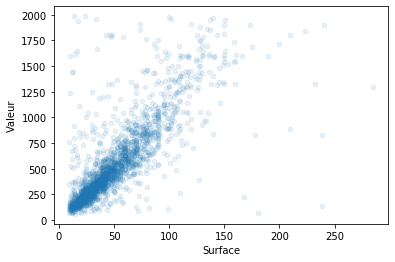

In [179]:
# On peut tracer le prix en fonction de la surface

df[df['Valeur'] < 2000].sample(2000).plot(x = 'Surface', y = 'Valeur', kind = 'scatter', alpha = .1)
# On a tracé le graphe pour les appartements ayant un prix inférieur à 2 millions

On voit une relation linéaire apparaitre, justifiée par un coefficient de corrélation significatif, de 0.58 

In [180]:
df['Valeur'].corr(df['Surface'])

0.5773341774970066

#### On fait donc l'hypothèse qu'il y a une corélation linéaire entre le prix d'un appartement et sa surface en m2.
#### On se donnera donc pour objectif de prédir le prix au m2 d'un appartement en fonction de différents paramètres.

## 4. Gestion des anomalies

La base de données n'est pas parfaite, certaines entrées sont erronées.
La premier nettoyage que nous allons faire, qui est aussi le plus grossier, est de se restreindre à des prix au m2 raisonnables.
#### Le site meilleursagents.com recense les prix au m2 de nombreux appartements à Paris. 
#### Les prix les plus bas observé sont environ de 4 700 €/m2
#### Les prix les plus hauts observés sont environ de 32 000 €/m2

#### On choisit donc de considérer les biens dont le prix au m2 est compris entre 4 230 € et 35 200 (marge de 10%)

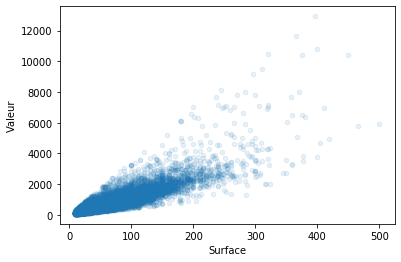

In [181]:
df = df[df['prixm2'] > 4.23]
df = df[df['prixm2'] < 35.2]

df.plot(x = 'Surface', y = 'Valeur', kind = 'scatter', alpha = .1)

# Couplage : date de construction du bâtis

In [182]:
df_dates = pd.read_csv('data/date_construction.csv', sep = ',')
df_join = pd.read_csv('data/PARCELLE_CADASTRALE.csv', sep = ',')

/Users/lilianmarey/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.

/Users/lilianmarey/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



In [183]:
df_join = df_join[['n_sq_pc', 'c_sec', 'n_pc']]
df_dates = df_dates[['n_sq_pc', 'c_perconst']]

In [184]:
df_dates = df_dates.merge(df_join, left_on = 'n_sq_pc', right_on = 'n_sq_pc')
df_dates = df_dates.drop(columns = ['n_sq_pc'])

In [185]:
df['id2'] = df.apply(lambda row: str(row.Section) + str(row.No_plan), axis = 1)
df_dates['id2'] = df_dates.apply(lambda row: str(row.c_sec) + str(row.n_pc), axis = 1)

In [186]:
df = df.merge(df_dates, left_on = 'id2', right_on = 'id2')

In [187]:
df = df.drop(columns = ['id2', 'c_sec', 'n_pc', 'Section', 'No_plan'])

In [189]:
df = df.rename(columns = {'c_perconst': 'periode_construction'})

In [190]:
df.head(10)

Date  Valeur  Numero TypeVoie    Voie  CodePostal  Surface  NbPieces  \
0  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   
1  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   
2  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   
3  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   
4  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   
5  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   
6  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   
7  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   
8  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   
9  04/01/2019  1196.0    17.0      RUE  DUPHOT     75001.0    112.0       3.0   

     TypeLocal     prixm2                id  periode_construction  
0  Appartement  10.678571  75101_2999_00017                   5.0  
1  Appartement  10.678571  75101_2999_00017                   5.0  
2  Appartement  10.678571  75101_2999_00017                   5.0  
3  Appartement  10.678571  75101_2999_00017                   2.0  
4  Appartement  10.678571  75101_2999_00017                   2.0  
5  Appartement  10.678571  75101_2999_00017                   3.0  
6  Appartement  10.678571  75101_2999_00017                   1.0  
7  Appartement  10.678571  75101_2999_00017                   1.0  
8  Appartement  10.678571  75101_2999_00017                   3.0  
9  Appartement  10.678571  75101_2999_00017                   7.0

# Couplage avec la base des données GPS

On souhaite obtenir les coordonnées GPS de tous les appartements présents dans la base.
Pour cela, nous avons trouvé une base de données qui répertorient toutes les adresses parisiennes et leur associe des coordonnées GPS.
Pour coupler les deux bases, nous utiliserons la variable id.
Ce code id est de la forme WWXXX_YYYY_ZZZZZ avec : 	
##### WW est le code département (75 ici)
##### XXX est le code commune (115 pour le 15ème arrondissement)
##### YYYY est le code voie (4903 pour l'avenue Jean Jaurès par exemple)
##### ZZZZ est le numéro (00005 pour le 5)


In [191]:
df2 = pd.read_csv('https://adresse.data.gouv.fr/data/ban/adresses/latest/csv/adresses-75.csv.gz', sep = ';').copy()

In [192]:
df2.sample(5)

id  id_fantoir  numero  rep             nom_voie  \
118949  75113_0736_00086  75113_0736      86  NaN      Rue Baudricourt   
82730   75117_4174_00014  75117_4174      14  NaN  Rue Gilbert Cesbron   
9721    75102_9892_00022  75102_9892      22  NaN     Galerie Vivienne   
111140  75113_1990_00103  75113_1990     103  NaN    Rue du Chevaleret   
29887   75109_6541_00018  75109_6541      18  NaN       Rue de Montyon   

        code_postal  code_insee               nom_commune  \
118949        75013       75113  Paris 13e Arrondissement   
82730         75017       75117  Paris 17e Arrondissement   
9721          75002       75102   Paris 2e Arrondissement   
111140        75013       75113  Paris 13e Arrondissement   
29887         75009       75109   Paris 9e Arrondissement   

        code_insee_ancienne_commune  nom_ancienne_commune          x  \
118949                          NaN                   NaN  653165.46   
82730                           NaN                   NaN  649669.19   
9721                            NaN                   NaN  651563.77   
111140                          NaN                   NaN  654090.75   
29887                           NaN                   NaN  651861.81   

                 y       lon        lat  alias  nom_ld libelle_acheminement  \
118949  6858433.20  2.362088  48.824258    NaN     NaN                PARIS   
82730   6866138.51  2.313557  48.893287    NaN     NaN                PARIS   
9721    6863149.23  2.339736  48.866550    NaN     NaN                PARIS   
111140  6859142.58  2.374614  48.830704    NaN     NaN                PARIS   
29887   6863881.70  2.343715  48.873160    NaN     NaN                PARIS   

                  nom_afnor source_position source_nom_voie  
118949      RUE BAUDRICOURT         commune         commune  
82730   RUE GILBERT CESBRON         commune         commune  
9721       GALERIE VIVIENNE         commune         commune  
111140    RUE DU CHEVALERET         commune         commune  
29887        RUE DE MONTYON         commune         commune

### Séléction des variables intéressantes

In [193]:
df_GPS = df2[[
        'id', 'lon', 'lat', 
        ]]

# x et y : Coordonnées cartographique en projection légale
# lon et lat : Coordonnées en WGS-84	

df_GPS.sample(10)

id       lon        lat
19721     75105_2069_00072  2.345867  48.840466
16288   75106_0551_00008_b  2.337977  48.844215
145695    75115_1255_00065  2.303427  48.832520
107504    75120_8603_00075  2.406721  48.872448
123474    75116_9810_00019  2.265969  48.843343
27176     75109_2268_00052  2.343087  48.880289
48047     75111_9057_00008  2.385964  48.863791
14062     75106_0309_00006  2.338379  48.853420
67083     75119_7727_00002  2.401954  48.879061
135899    75115_5469_00016  2.290154  48.831673

### Couplage avec df

In [194]:
print(df.shape)
df = df.merge(df_GPS, left_on = 'id', right_on = 'id')
print(df.shape)

display(df.sample(10))

(363073, 12)
(362191, 14)


Date    Valeur  Numero TypeVoie                  Voie  \
336569  14/10/2019   153.000     3.0      RUE                FAUVET   
248172  01/04/2019   442.650    12.0      PAS                  ROUX   
32222   28/06/2019   885.000    78.0      RUE          DES ARCHIVES   
113854  07/03/2019   437.000    26.0      RUE  SAINT ANDRE DES ARTS   
245956  03/07/2019   380.000    87.0      RUE              CARDINET   
360106  01/04/2019   190.476     9.0      RUE            BACHAUMONT   
125849  18/03/2019  1231.500    55.0       BD       DU MONTPARNASSE   
270040  23/01/2019   550.000     7.0      PAS               D ENFER   
231779  06/03/2019   640.000    27.0       AV           DE LOWENDAL   
33933   02/04/2019   498.700     7.0      RUE              DE BERNE   

        CodePostal  Surface  NbPieces    TypeLocal     prixm2  \
336569     75018.0     15.0       1.0  Appartement  10.200000   
248172     75017.0     21.0       1.0  Appartement  21.078571   
32222      75003.0     83.0       2.0  Appartement  10.662651   
113854     75006.0     27.0       1.0  Appartement  16.185185   
245956     75017.0     38.0       2.0  Appartement  10.000000   
360106     75002.0     16.0       1.0  Appartement  11.904750   
125849     75006.0    101.0       5.0  Appartement  12.193069   
270040     75014.0     50.0       2.0  Appartement  11.000000   
231779     75015.0     56.0       3.0  Appartement  11.428571   
33933      75008.0     41.0       2.0  Appartement  12.163415   

                      id  periode_construction       lon        lat  
336569  75118_3532_00003                   2.0  2.327625  48.888861  
248172  75117_8412_00012                   3.0  2.297280  48.881228  
32222   75103_0420_00078                   2.0  2.359957  48.862654  
113854  75106_8484_00026                   1.0  2.342581  48.853328  
245956  75117_1550_00087                   1.0  2.309810  48.884636  
360106  75102_0622_00009                   6.0  2.345849  48.865947  
125849  75106_6522_00055                   5.0  2.322696  48.844486  
270040  75114_3282_00007                  11.0  2.332303  48.839082  
231779  75115_5827_00027                  12.0  2.303614  48.849049  
33933   75108_0900_00007                   3.0  2.323580  48.880386

On peut donc maintenant représenter les appartements dans un plan de Paris.

In [195]:
fig = px.scatter(df[df['prixm2'] < 20].sample(9000), x = 'lon', y = 'lat',
              color = 'prixm2',  width = 800, height = 627, opacity = .4, template = 'simple_white', color_continuous_scale = ['rgb(255,255,0)', 'rgb(255,0,0)'])
fig.show()

On constate bien les faits stylisé déjà connu : 
#### Les quartiers périphériques sont en général moins chers que les quartiers centraux.
#### Les quartiers de l'ouest sont plus chers que ceux à l'est.

In [196]:
# Affichage dns un fond de carte

map_osm = folium.Map(location = [48.853332, 2.348776], tiles = 'CartoDB dark_matter', zoom_start = 12.2)

paliers = np.linspace(4.23, 20, 10)

df_test = df[df['prixm2'] < 20].sample(3000)

for i in range(9):

    df_pal = df_test[df_test['prixm2'] < paliers[i + 1]]
    df_pal = df_test[df_test['prixm2'] > paliers[i]]

    couleur = 'rgb(' + str(255) + ',' + str(255 * (10 - i) / 10) + ',' + str(0) + ')'

    for lat, lon in [(row.lat, row.lon) for _, row in df_pal.iterrows()]:
        map_osm.add_child(folium.CircleMarker(location = [lat, lon], radius = 1, color = couleur))

map_osm

# II. Traitement des données - ajout de variables


In [199]:
df_ml = df.drop(columns = ['Date', 'Valeur', 'Surface', 'Numero', 'TypeVoie', 
                           'Voie', 'CodePostal', 'TypeLocal', 'id'])
df_ml.head()

NbPieces     prixm2  periode_construction       lon        lat
0       3.0  10.678571                   5.0  2.325456  48.868446
1       3.0  10.678571                   5.0  2.325456  48.868446
2       3.0  10.678571                   5.0  2.325456  48.868446
3       3.0  10.678571                   2.0  2.325456  48.868446
4       3.0  10.678571                   2.0  2.325456  48.868446

In [200]:
corr_matrix = df_ml.corr()
corr_matrix["prixm2"].sort_values(ascending = False)
# les variables sont toutes plutôt décorélées avec le prix au m2

prixm2                  1.000000
NbPieces                0.055035
periode_construction   -0.006740
lat                    -0.070081
lon                    -0.135020
Name: prixm2, dtype: float64

## Base de donnée des monuments

In [201]:
df_monuments = pd.read_csv('/Users/lilianmarey/Desktop/Python/PrixImmobilier/data/monuments.csv', sep = ';')

# On standardise le nombre de visiteurs
df_monuments['visiteurs']/=max(df_monuments['visiteurs'])


In [202]:
df_monuments.head()

nom  visiteurs        lat       lon
0                       Musée du Louvre   0.750000  48.860546  2.337612
1                       Centre Pompidou   0.261143  48.860637  2.352224
2                         Musée d'Orsay   0.241634  48.859959  2.326570
3  Cité des Sciences et de l'Industrie    0.162735  48.895373  2.387874
4  Musée National d'Histoire Naturelle    0.149731  48.843347  2.363467

### Calcul du score de proximité aux monuments

In [203]:
def calcule_scores_monument(lat,lon):

    distances_aux_monuments = []

    for i,row in df_monuments.iterrows():
        distances_aux_monuments.append((row.nom, row.visiteurs, vincenty((row.lat, row.lon), (lat, lon))))

    try:
        score_1 = max([monument[1] for monument in distances_aux_monuments if monument[2] < 1])
    except:
        score_1 = 0

    try:
        score_2 = len([monument[1]/monument[2] for monument in distances_aux_monuments if monument[2] < 3])
    except:
        score_2 = 0

    return score_1, score_2

In [ ]:
L1, L2 = [],[]
for _, row in df_ml.iterrows():
    (a,b) = calcule_scores_monument(row.lat, row.lon)
    L1.append(a)
    L2.append(b)

In [ ]:
df_ml['score_1'], df_ml['score_2'] = L1, L2

df_ml['score_2'] /= max(df_ml['score_2'])

df_ml['score_monument'] = ( (1/5) * df_ml['score_1'] + (4/5) * df_ml['score_2'] ) 

df_ml = df_ml.drop(columns = ['score_1', 'score_2'])
df_ml.head()

In [ ]:
#map_osm = folium.Map(location = [48.853332, 2.348776], tiles = 'CartoDB dark_matter', zoom_start = 12.2)

#df_ml = df_ml.sort_values(by = 'score_monument', ascending = False)

#for lat, lon in [(row.lat, row.lon) for _, row in df_ml.head(200).iterrows()]:
 #   map_osm.add_child(folium.CircleMarker(location = [lat, lon], radius = 1))

#map_osm

In [ ]:
fig = px.scatter(df_ml, x = 'lon', y = 'lat',
                color = 'score_monument',  width = 800, height = 627, opacity = .4, 
                template = 'simple_white', color_continuous_scale = ['rgb(255,255,0)', 'rgb(255,0,0)']
                )
fig.show()